学习sklearn聚类分析。

# K-means聚类

In [3]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 生成聚类数据
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# 执行KMeans聚类
cluster_kmeans = KMeans(n_clusters=4, random_state=0)

# 训练模型
cluster_kmeans.fit(X)

# 获取聚类标签
labels = cluster_kmeans.labels_
labels

array([1, 2, 0, 2, 1, 1, 3, 0, 2, 2, 3, 2, 0, 2, 1, 0, 0, 1, 3, 3, 1, 1,
       0, 3, 3, 0, 1, 0, 3, 0, 2, 2, 0, 2, 2, 2, 2, 2, 3, 1, 0, 3, 0, 0,
       3, 3, 2, 3, 2, 1, 3, 1, 2, 1, 1, 3, 2, 3, 2, 1, 2, 0, 2, 3, 3, 3,
       2, 1, 2, 3, 0, 3, 2, 3, 3, 2, 3, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0,
       2, 2, 0, 1, 2, 3, 3, 0, 1, 1, 0, 3, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0,
       3, 3, 1, 2, 1, 0, 2, 1, 1, 0, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 2, 3,
       3, 1, 2, 3, 3, 2, 0, 2, 2, 3, 0, 3, 0, 3, 2, 0, 2, 2, 2, 0, 2, 0,
       1, 3, 2, 3, 1, 0, 2, 0, 0, 1, 0, 3, 3, 0, 1, 0, 0, 2, 1, 0, 3, 2,
       1, 1, 0, 3, 1, 0, 3, 3, 0, 0, 0, 0, 1, 2, 0, 3, 0, 0, 3, 3, 3, 0,
       3, 2, 0, 3, 1, 3, 0, 2, 3, 2, 0, 2, 0, 3, 0, 0, 2, 3, 3, 1, 1, 0,
       2, 1, 1, 3, 1, 3, 0, 2, 2, 0, 0, 2, 0, 1, 3, 0, 1, 3, 2, 3, 1, 0,
       1, 2, 2, 2, 2, 3, 3, 2, 0, 3, 1, 0, 3, 3, 3, 1, 1, 2, 0, 0, 3, 1,
       2, 3, 0, 2, 0, 1, 1, 3, 3, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1,
       2, 3, 2, 0, 1, 1, 2, 2, 2, 1, 1, 0, 2, 3], d

In [18]:
X.shape

(300, 2)

In [15]:
# 准备调参
# 设定参数范围
k_range = range(2, 11)

# 设定列表保存结果
results_silhouette = []

# 计算轮廓系数
from sklearn.metrics import silhouette_score
for k in k_range:
    cluster_kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_kmeans.fit(X)
    score = silhouette_score(X, cluster_kmeans.labels_)
    results_silhouette.append(score)

# 输出轮廓系数结果
for k, score in zip(k_range, results_silhouette):
    print(f'K={k}, Silhouette Score={score:.4f}')

K=2, Silhouette Score=0.4547
K=3, Silhouette Score=0.5890
K=4, Silhouette Score=0.6820
K=5, Silhouette Score=0.5824
K=6, Silhouette Score=0.4853
K=7, Silhouette Score=0.4966
K=8, Silhouette Score=0.4044
K=9, Silhouette Score=0.3987
K=10, Silhouette Score=0.3376


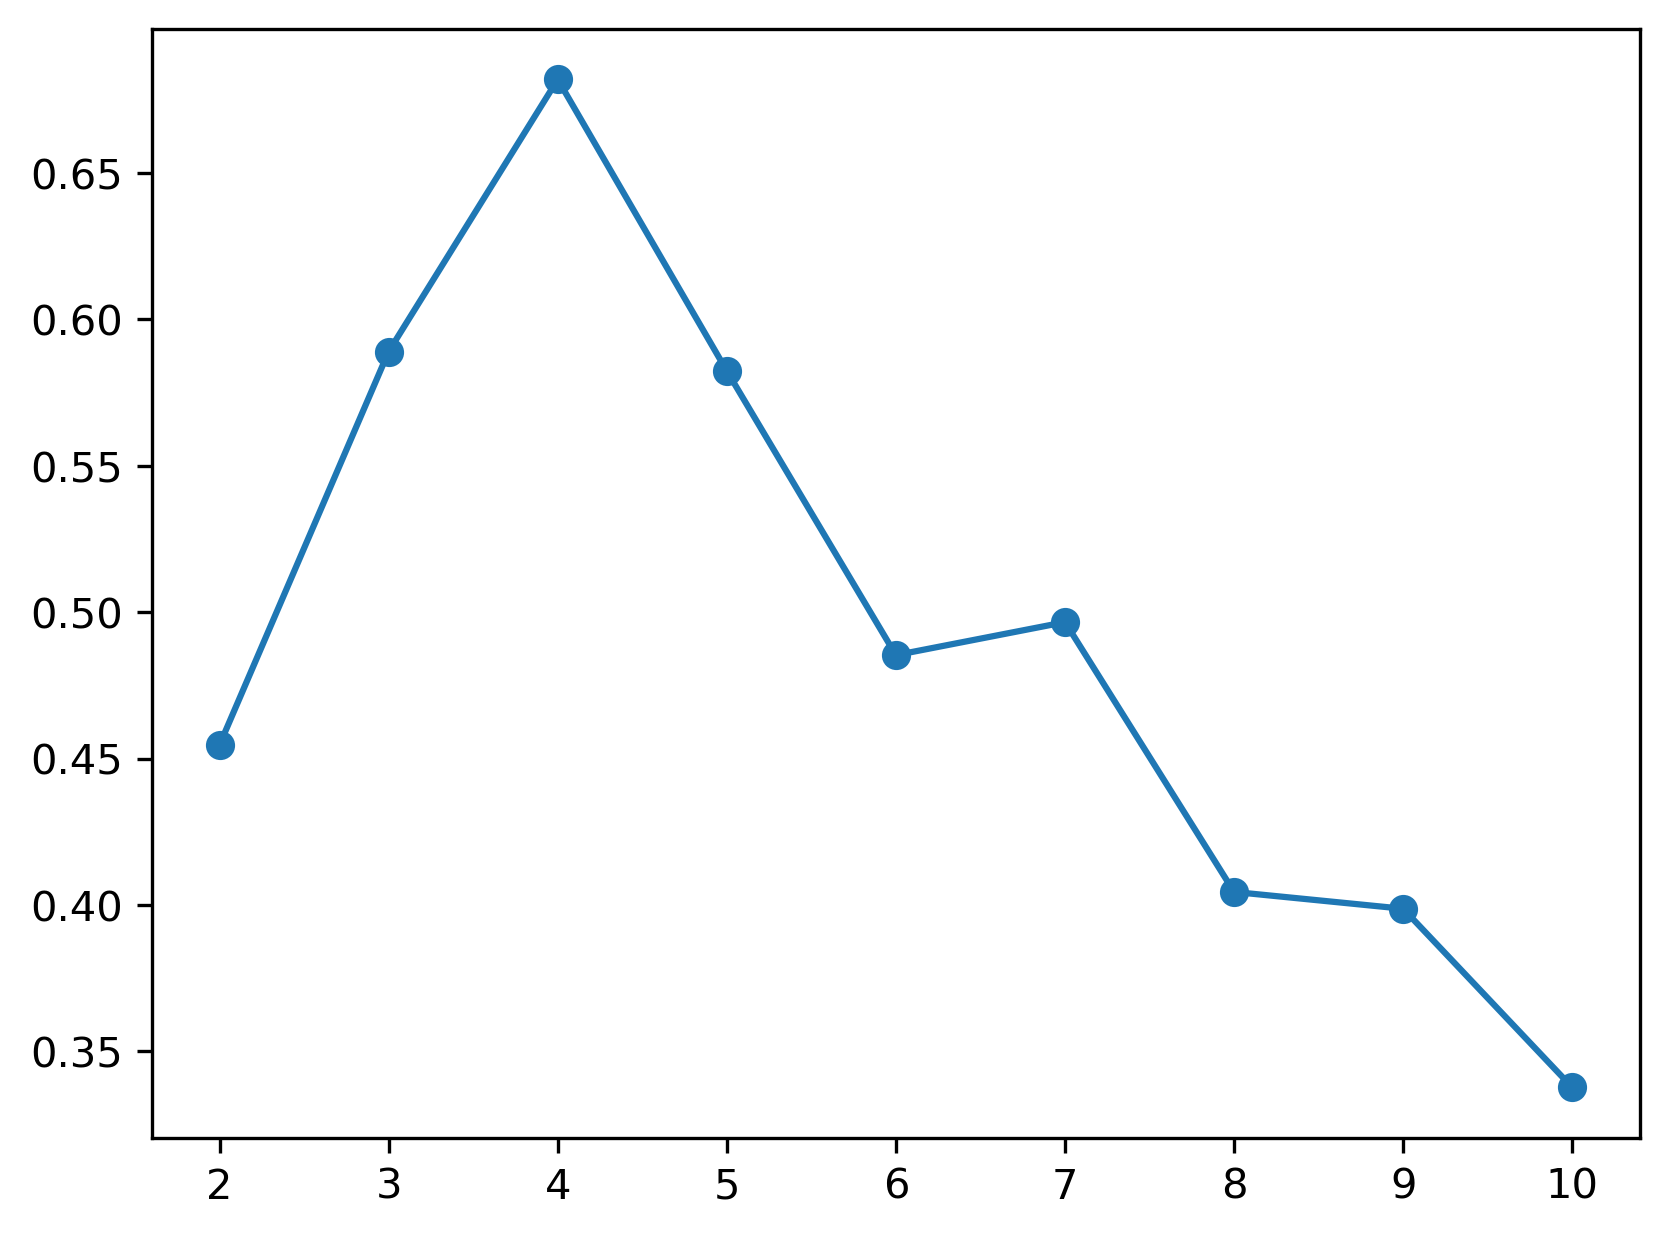

In [17]:
# 绘制折线图
import matplotlib.pyplot as plt
plt.figure(dpi=300)
plt.plot(k_range, results_silhouette, marker='o')
plt.show()

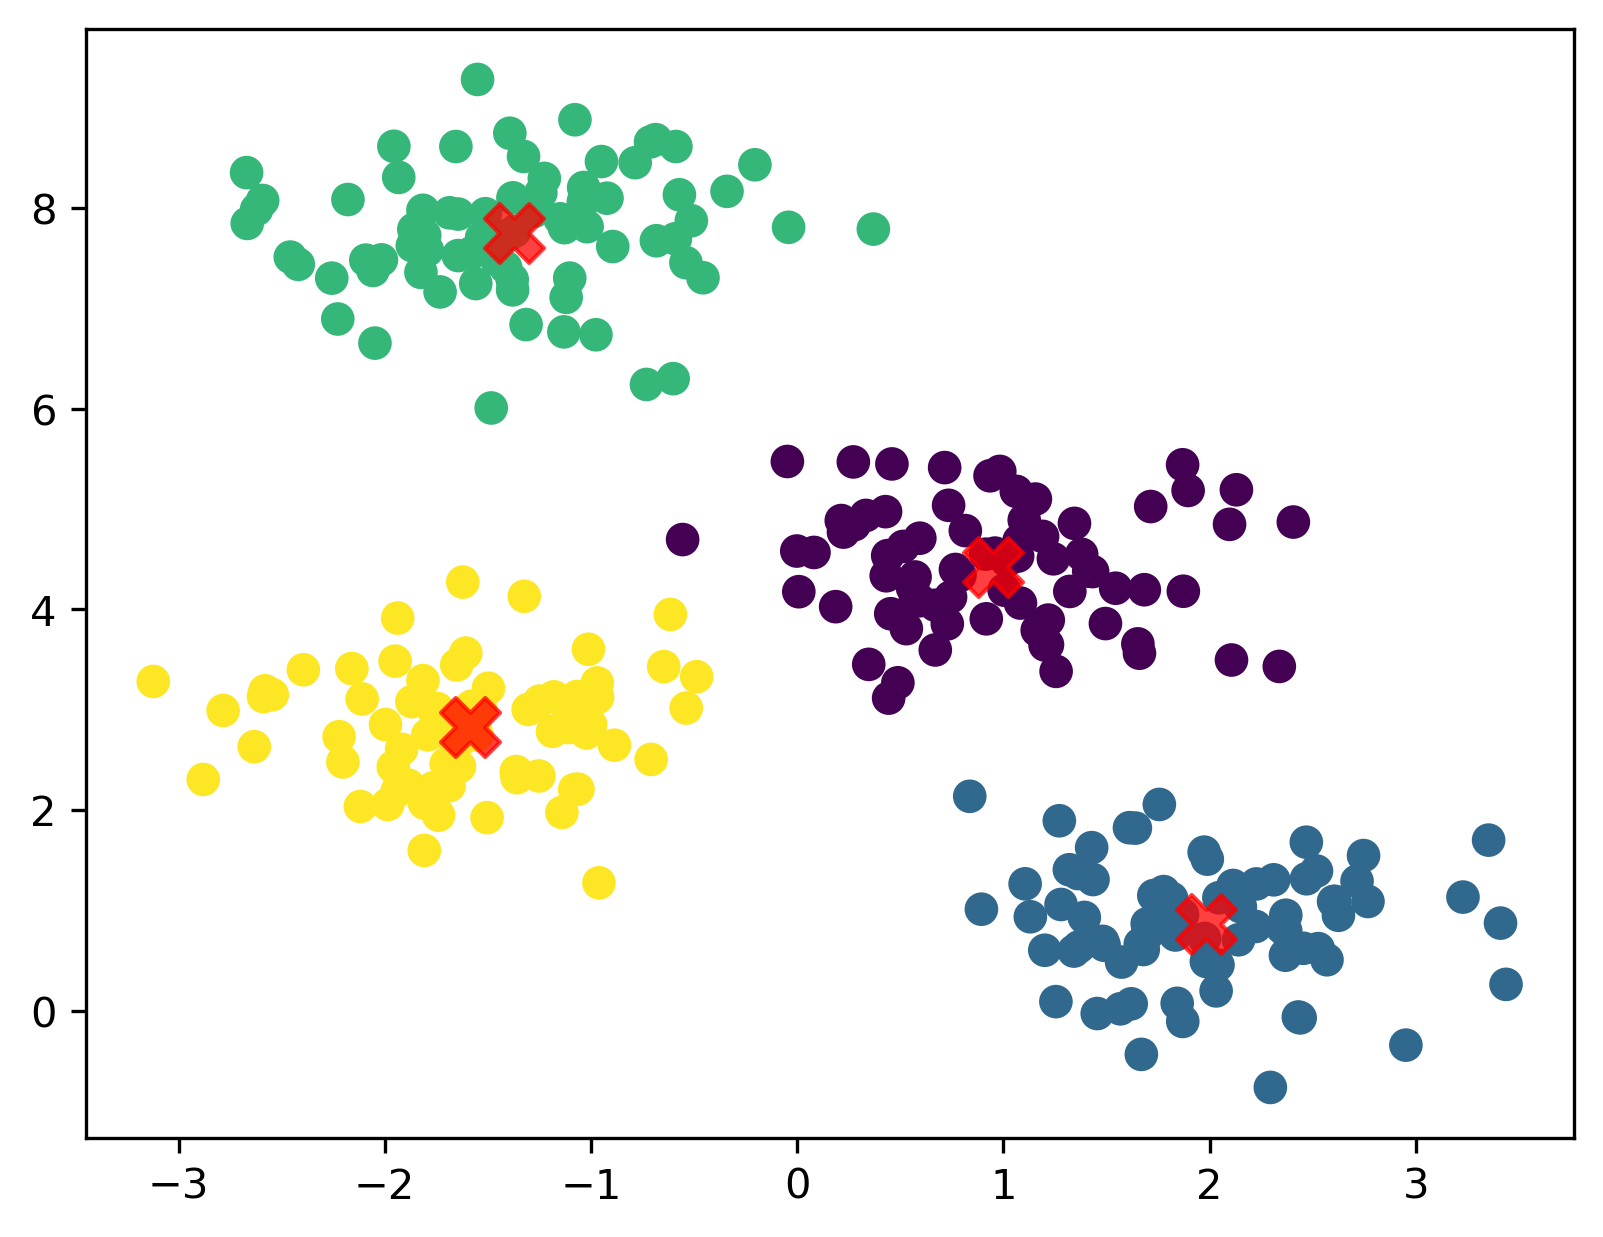

In [19]:
# 以k=4为例，绘制聚类结果
# 拟合模型
cluster_kmeans = KMeans(n_clusters=4, random_state=0)
cluster_kmeans.fit(X)

# 获取聚类标签
labels = cluster_kmeans.labels_

# 绘制聚类结果
plt.figure(dpi=300)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
centers = cluster_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.show()

# 层次聚类

In [20]:
# 使用层次聚类
from sklearn.cluster import AgglomerativeClustering

# 生成数据
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# 执行层次聚类
cluster_hierarchical = AgglomerativeClustering(n_clusters=4)

# 训练模型
cluster_hierarchical.fit(X)

# 获取聚类标签
labels_hierarchical = cluster_hierarchical.labels_
labels_hierarchical

array([2, 0, 1, 0, 2, 2, 3, 1, 0, 0, 3, 0, 1, 0, 2, 1, 1, 2, 3, 3, 2, 2,
       1, 3, 3, 1, 2, 1, 3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 2, 1, 3, 1, 1,
       3, 3, 0, 3, 0, 2, 3, 2, 0, 2, 2, 3, 0, 3, 0, 2, 0, 1, 0, 3, 3, 3,
       0, 2, 0, 3, 1, 3, 0, 3, 3, 0, 3, 1, 2, 0, 2, 1, 2, 2, 0, 1, 2, 1,
       0, 0, 1, 2, 0, 3, 3, 1, 2, 2, 1, 3, 0, 2, 0, 2, 1, 2, 2, 1, 0, 1,
       3, 3, 2, 0, 2, 1, 0, 2, 2, 1, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 0, 3,
       3, 2, 0, 3, 3, 0, 1, 0, 0, 3, 1, 3, 1, 3, 0, 1, 0, 0, 0, 1, 0, 1,
       2, 3, 0, 3, 2, 1, 0, 1, 1, 2, 1, 3, 3, 1, 2, 1, 1, 0, 2, 1, 3, 0,
       2, 2, 1, 3, 2, 1, 3, 3, 1, 1, 1, 1, 2, 0, 1, 3, 1, 1, 3, 3, 3, 1,
       3, 0, 1, 3, 2, 3, 1, 0, 3, 0, 1, 0, 1, 3, 1, 1, 0, 3, 3, 2, 2, 1,
       0, 2, 2, 3, 2, 3, 1, 0, 0, 1, 1, 0, 1, 2, 3, 1, 2, 3, 0, 3, 2, 1,
       2, 0, 0, 0, 0, 3, 3, 0, 1, 3, 2, 1, 3, 3, 3, 2, 2, 0, 1, 1, 3, 2,
       0, 3, 1, 0, 1, 2, 2, 3, 3, 1, 2, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 2,
       0, 3, 0, 1, 2, 2, 0, 0, 0, 2, 2, 1, 0, 3])

In [21]:
# 手动调参簇数量
from sklearn.metrics import silhouette_score
k_range = range(2, 11)
results_silhouette_hierarchical = []
for k in k_range:
    cluster_hierarchical = AgglomerativeClustering(n_clusters=k)
    cluster_hierarchical.fit(X)
    score = silhouette_score(X, cluster_hierarchical.labels_)
    results_silhouette_hierarchical.append(score)
# 输出轮廓系数结果
for k, score in zip(k_range, results_silhouette_hierarchical):
    print(f'K={k}, Silhouette Score={score:.4f}')

K=2, Silhouette Score=0.5473
K=3, Silhouette Score=0.5898
K=4, Silhouette Score=0.6820
K=5, Silhouette Score=0.5875
K=6, Silhouette Score=0.4932
K=7, Silhouette Score=0.3790
K=8, Silhouette Score=0.2917
K=9, Silhouette Score=0.3105
K=10, Silhouette Score=0.3223


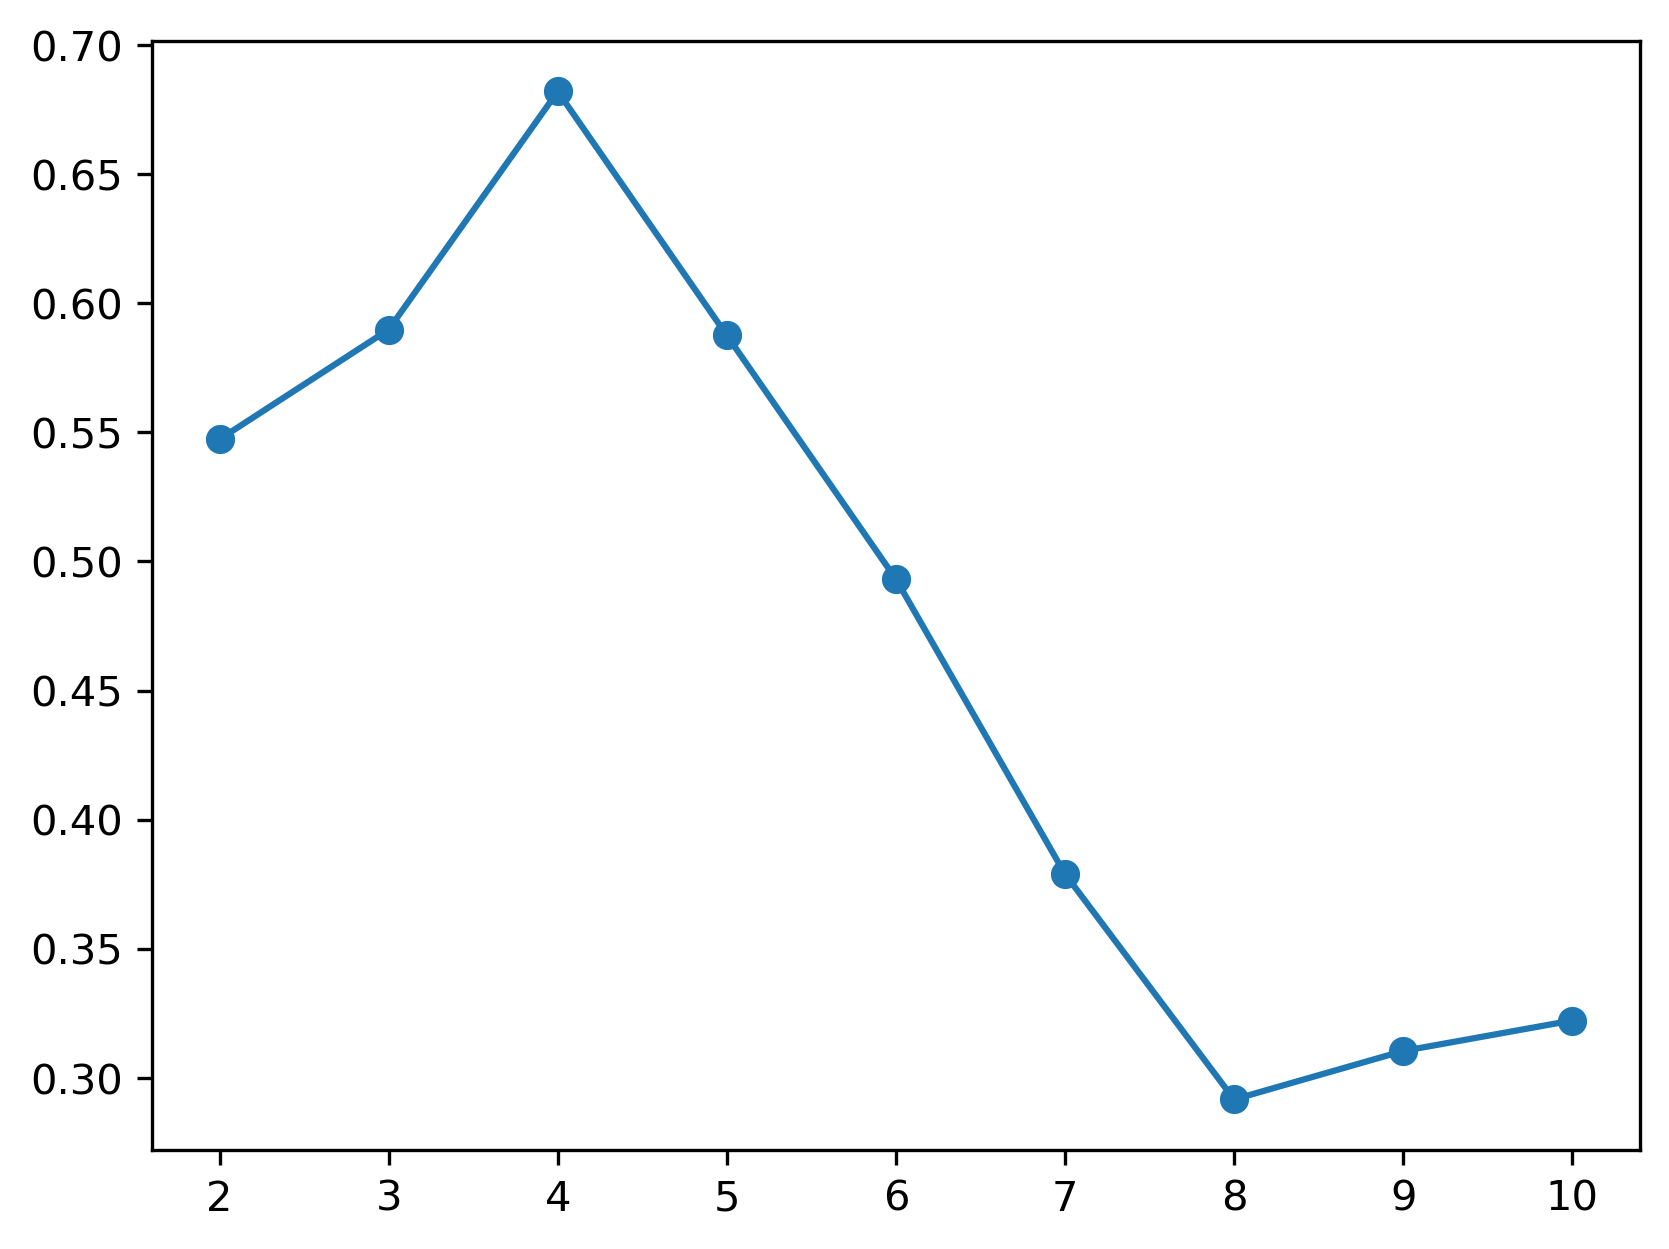

In [22]:
# 可视化结果
plt.figure(dpi=300)
plt.plot(k_range, results_silhouette_hierarchical, marker='o')
plt.show()

In [26]:
X.shape

(300, 2)

In [27]:
labels_hierarchical

array([2, 0, 1, 0, 2, 2, 3, 1, 0, 0, 3, 0, 1, 0, 2, 1, 1, 2, 3, 3, 2, 2,
       1, 3, 3, 1, 2, 1, 3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 2, 1, 3, 1, 1,
       3, 3, 0, 3, 0, 2, 3, 2, 0, 2, 2, 3, 0, 3, 0, 2, 0, 1, 0, 3, 3, 3,
       0, 2, 0, 3, 1, 3, 0, 3, 3, 0, 3, 1, 2, 0, 2, 1, 2, 2, 0, 1, 2, 1,
       0, 0, 1, 2, 0, 3, 3, 1, 2, 2, 1, 3, 0, 2, 0, 2, 1, 2, 2, 1, 0, 1,
       3, 3, 2, 0, 2, 1, 0, 2, 2, 1, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 0, 3,
       3, 2, 0, 3, 3, 0, 1, 0, 0, 3, 1, 3, 1, 3, 0, 1, 0, 0, 0, 1, 0, 1,
       2, 3, 0, 3, 2, 1, 0, 1, 1, 2, 1, 3, 3, 1, 2, 1, 1, 0, 2, 1, 3, 0,
       2, 2, 1, 3, 2, 1, 3, 3, 1, 1, 1, 1, 2, 0, 1, 3, 1, 1, 3, 3, 3, 1,
       3, 0, 1, 3, 2, 3, 1, 0, 3, 0, 1, 0, 1, 3, 1, 1, 0, 3, 3, 2, 2, 1,
       0, 2, 2, 3, 2, 3, 1, 0, 0, 1, 1, 0, 1, 2, 3, 1, 2, 3, 0, 3, 2, 1,
       2, 0, 0, 0, 0, 3, 3, 0, 1, 3, 2, 1, 3, 3, 3, 2, 2, 0, 1, 1, 3, 2,
       0, 3, 1, 0, 1, 2, 2, 3, 3, 1, 2, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 2,
       0, 3, 0, 1, 2, 2, 0, 0, 0, 2, 2, 1, 0, 3])

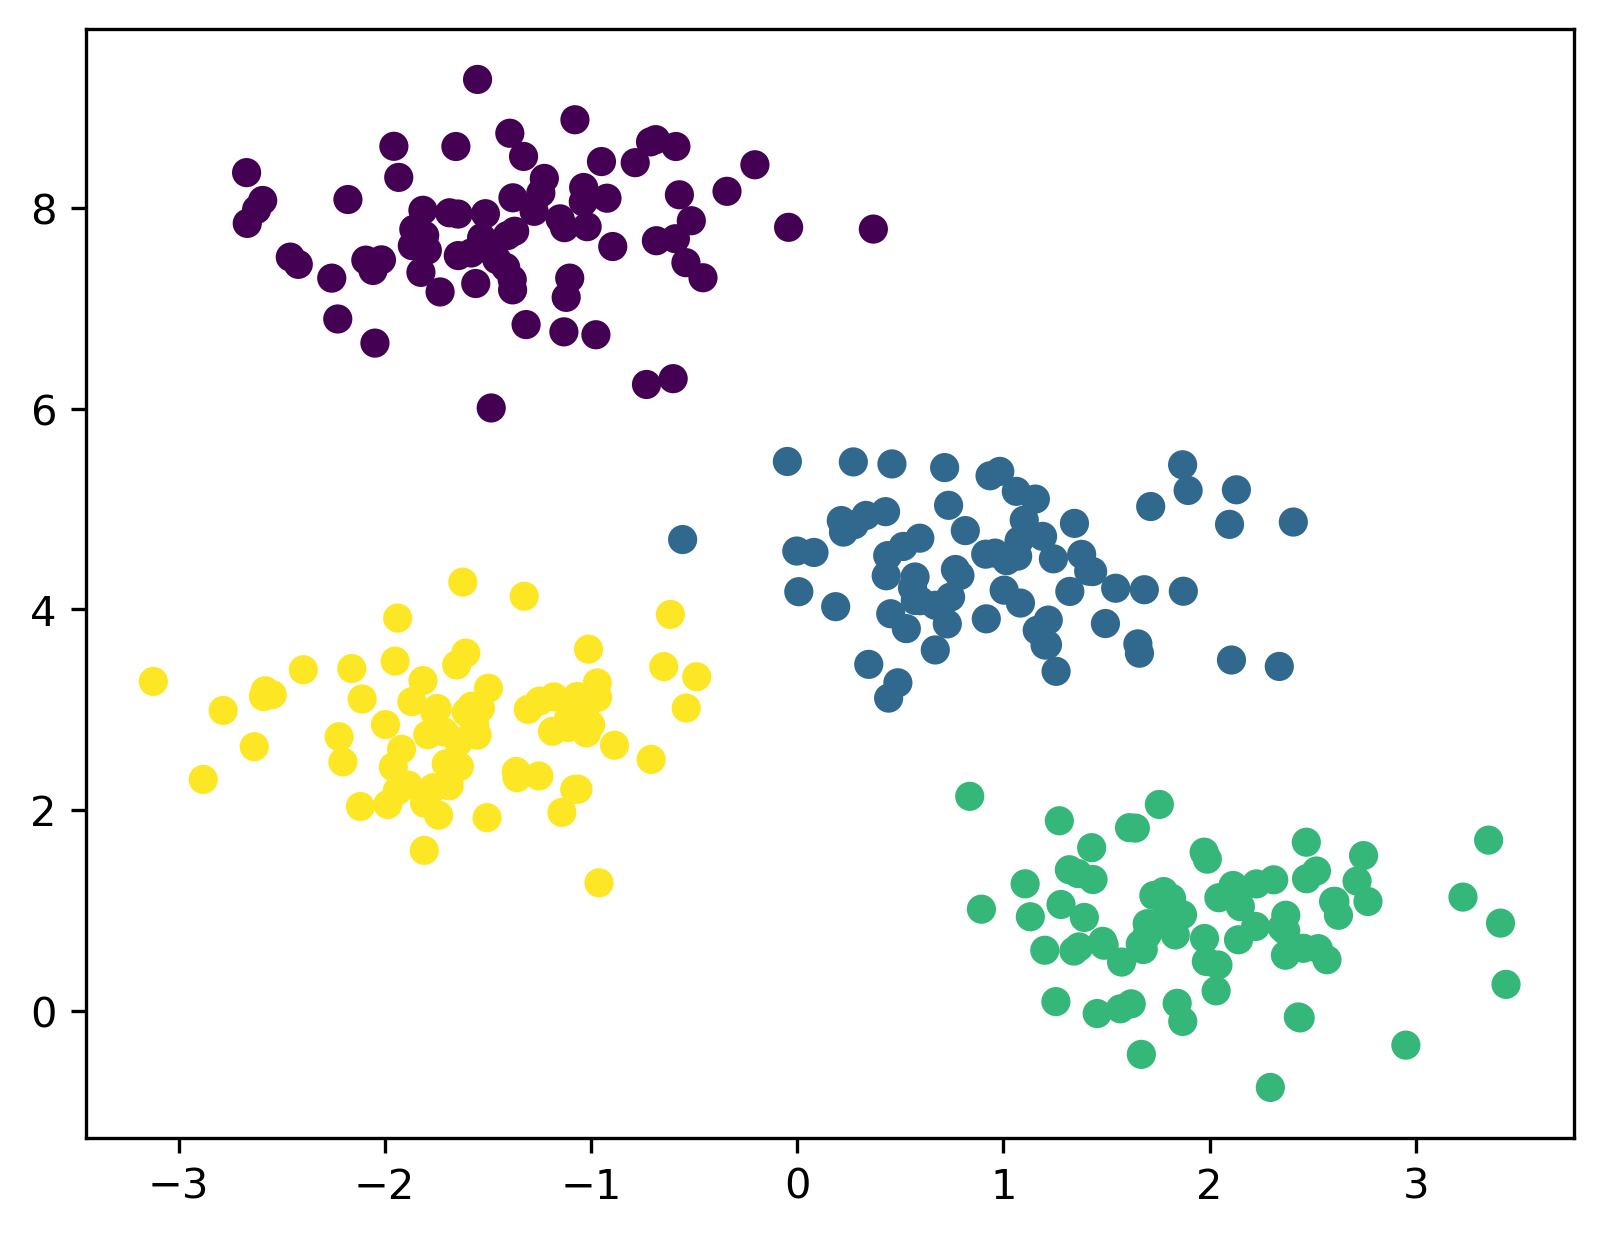

In [ ]:
# 以k=4为例，绘制聚类结果
from sklearn.cluster import AgglomerativeClustering
# 执行层次聚类
cluster_hierarchical = AgglomerativeClustering(n_clusters=4)
# 训练模型
cluster_hierarchical.fit(X)
# 获取聚类标签
labels_hierarchical = cluster_hierarchical.labels_
# 绘制聚类结果
plt.figure(dpi=300)
plt.scatter(X[:, 0], X[:, 1], c=labels_hierarchical, cmap='viridis')
plt.show()

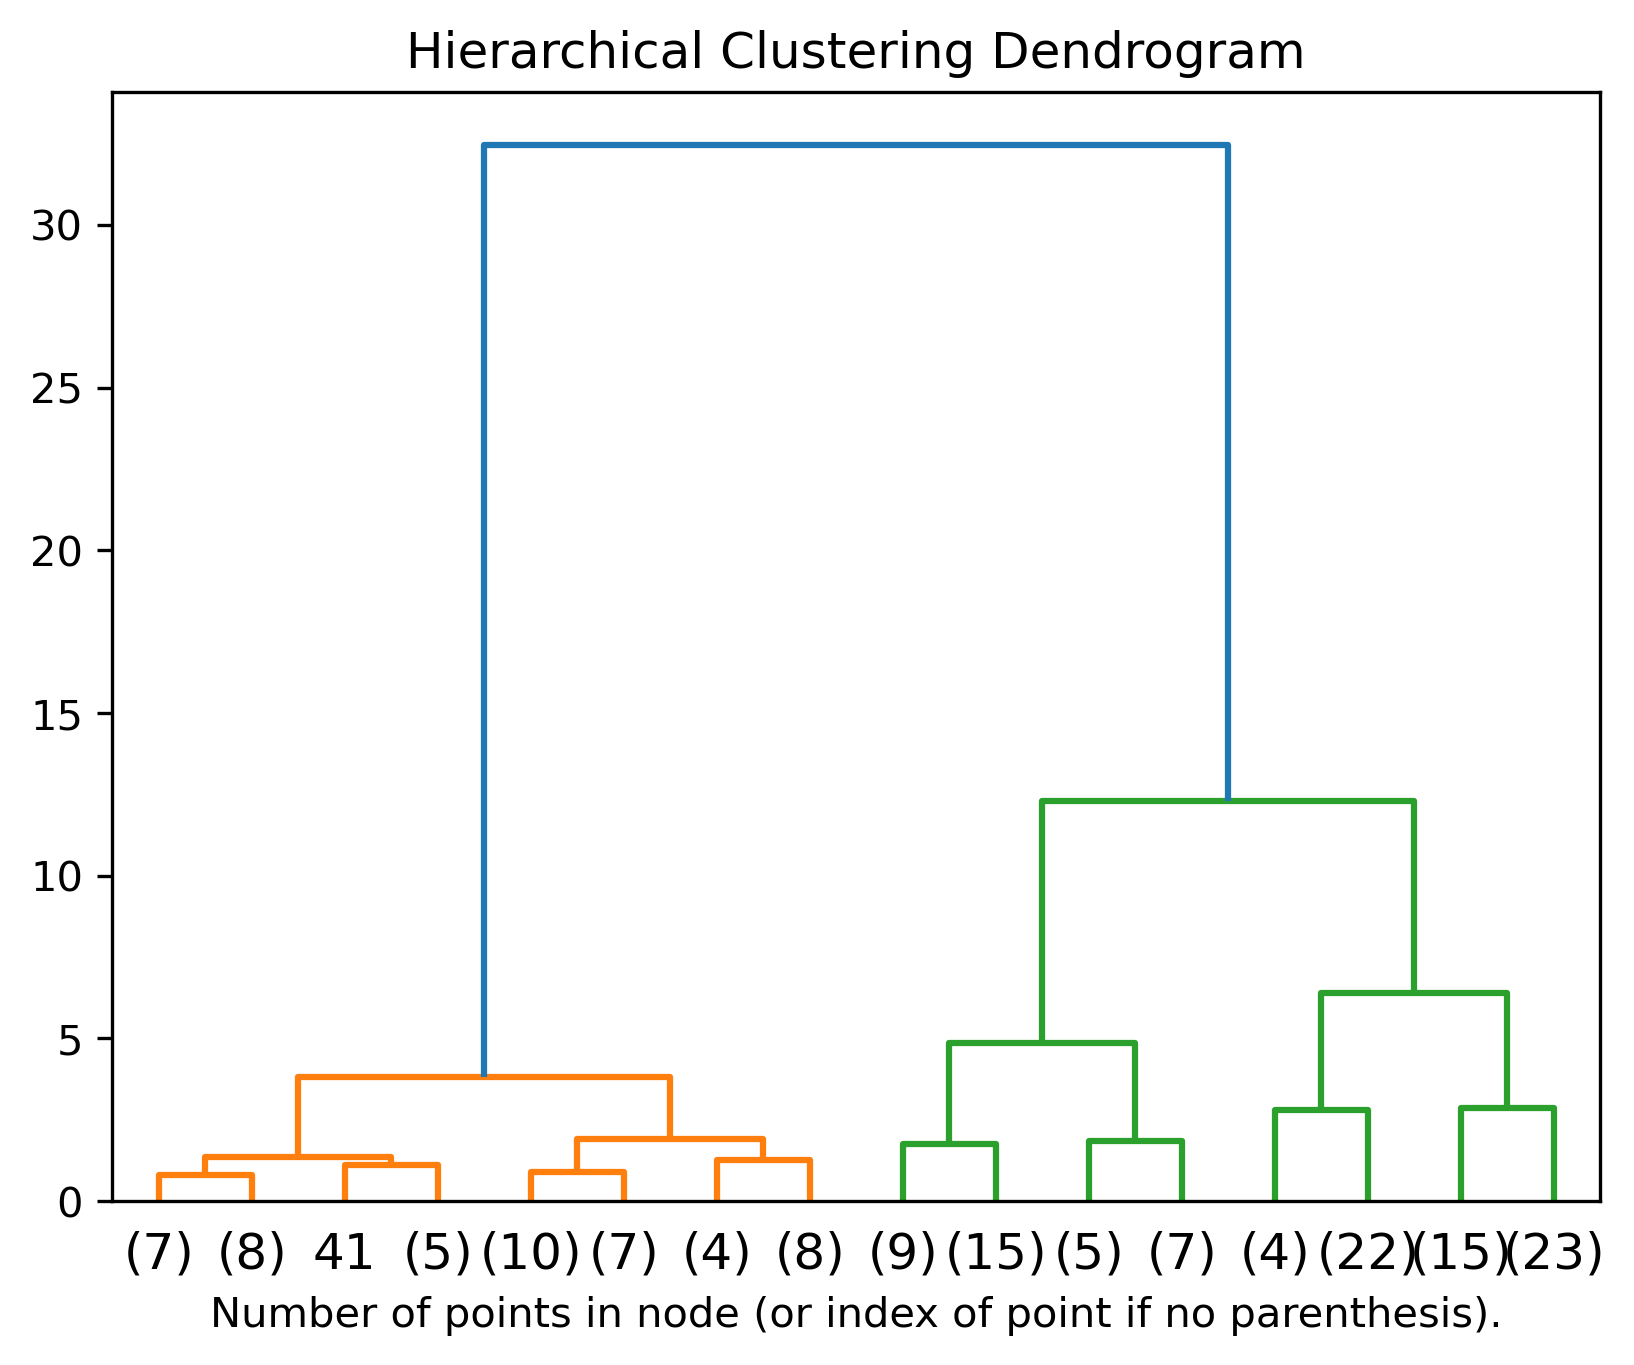

In [30]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.figure(dpi=300)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()